<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0    

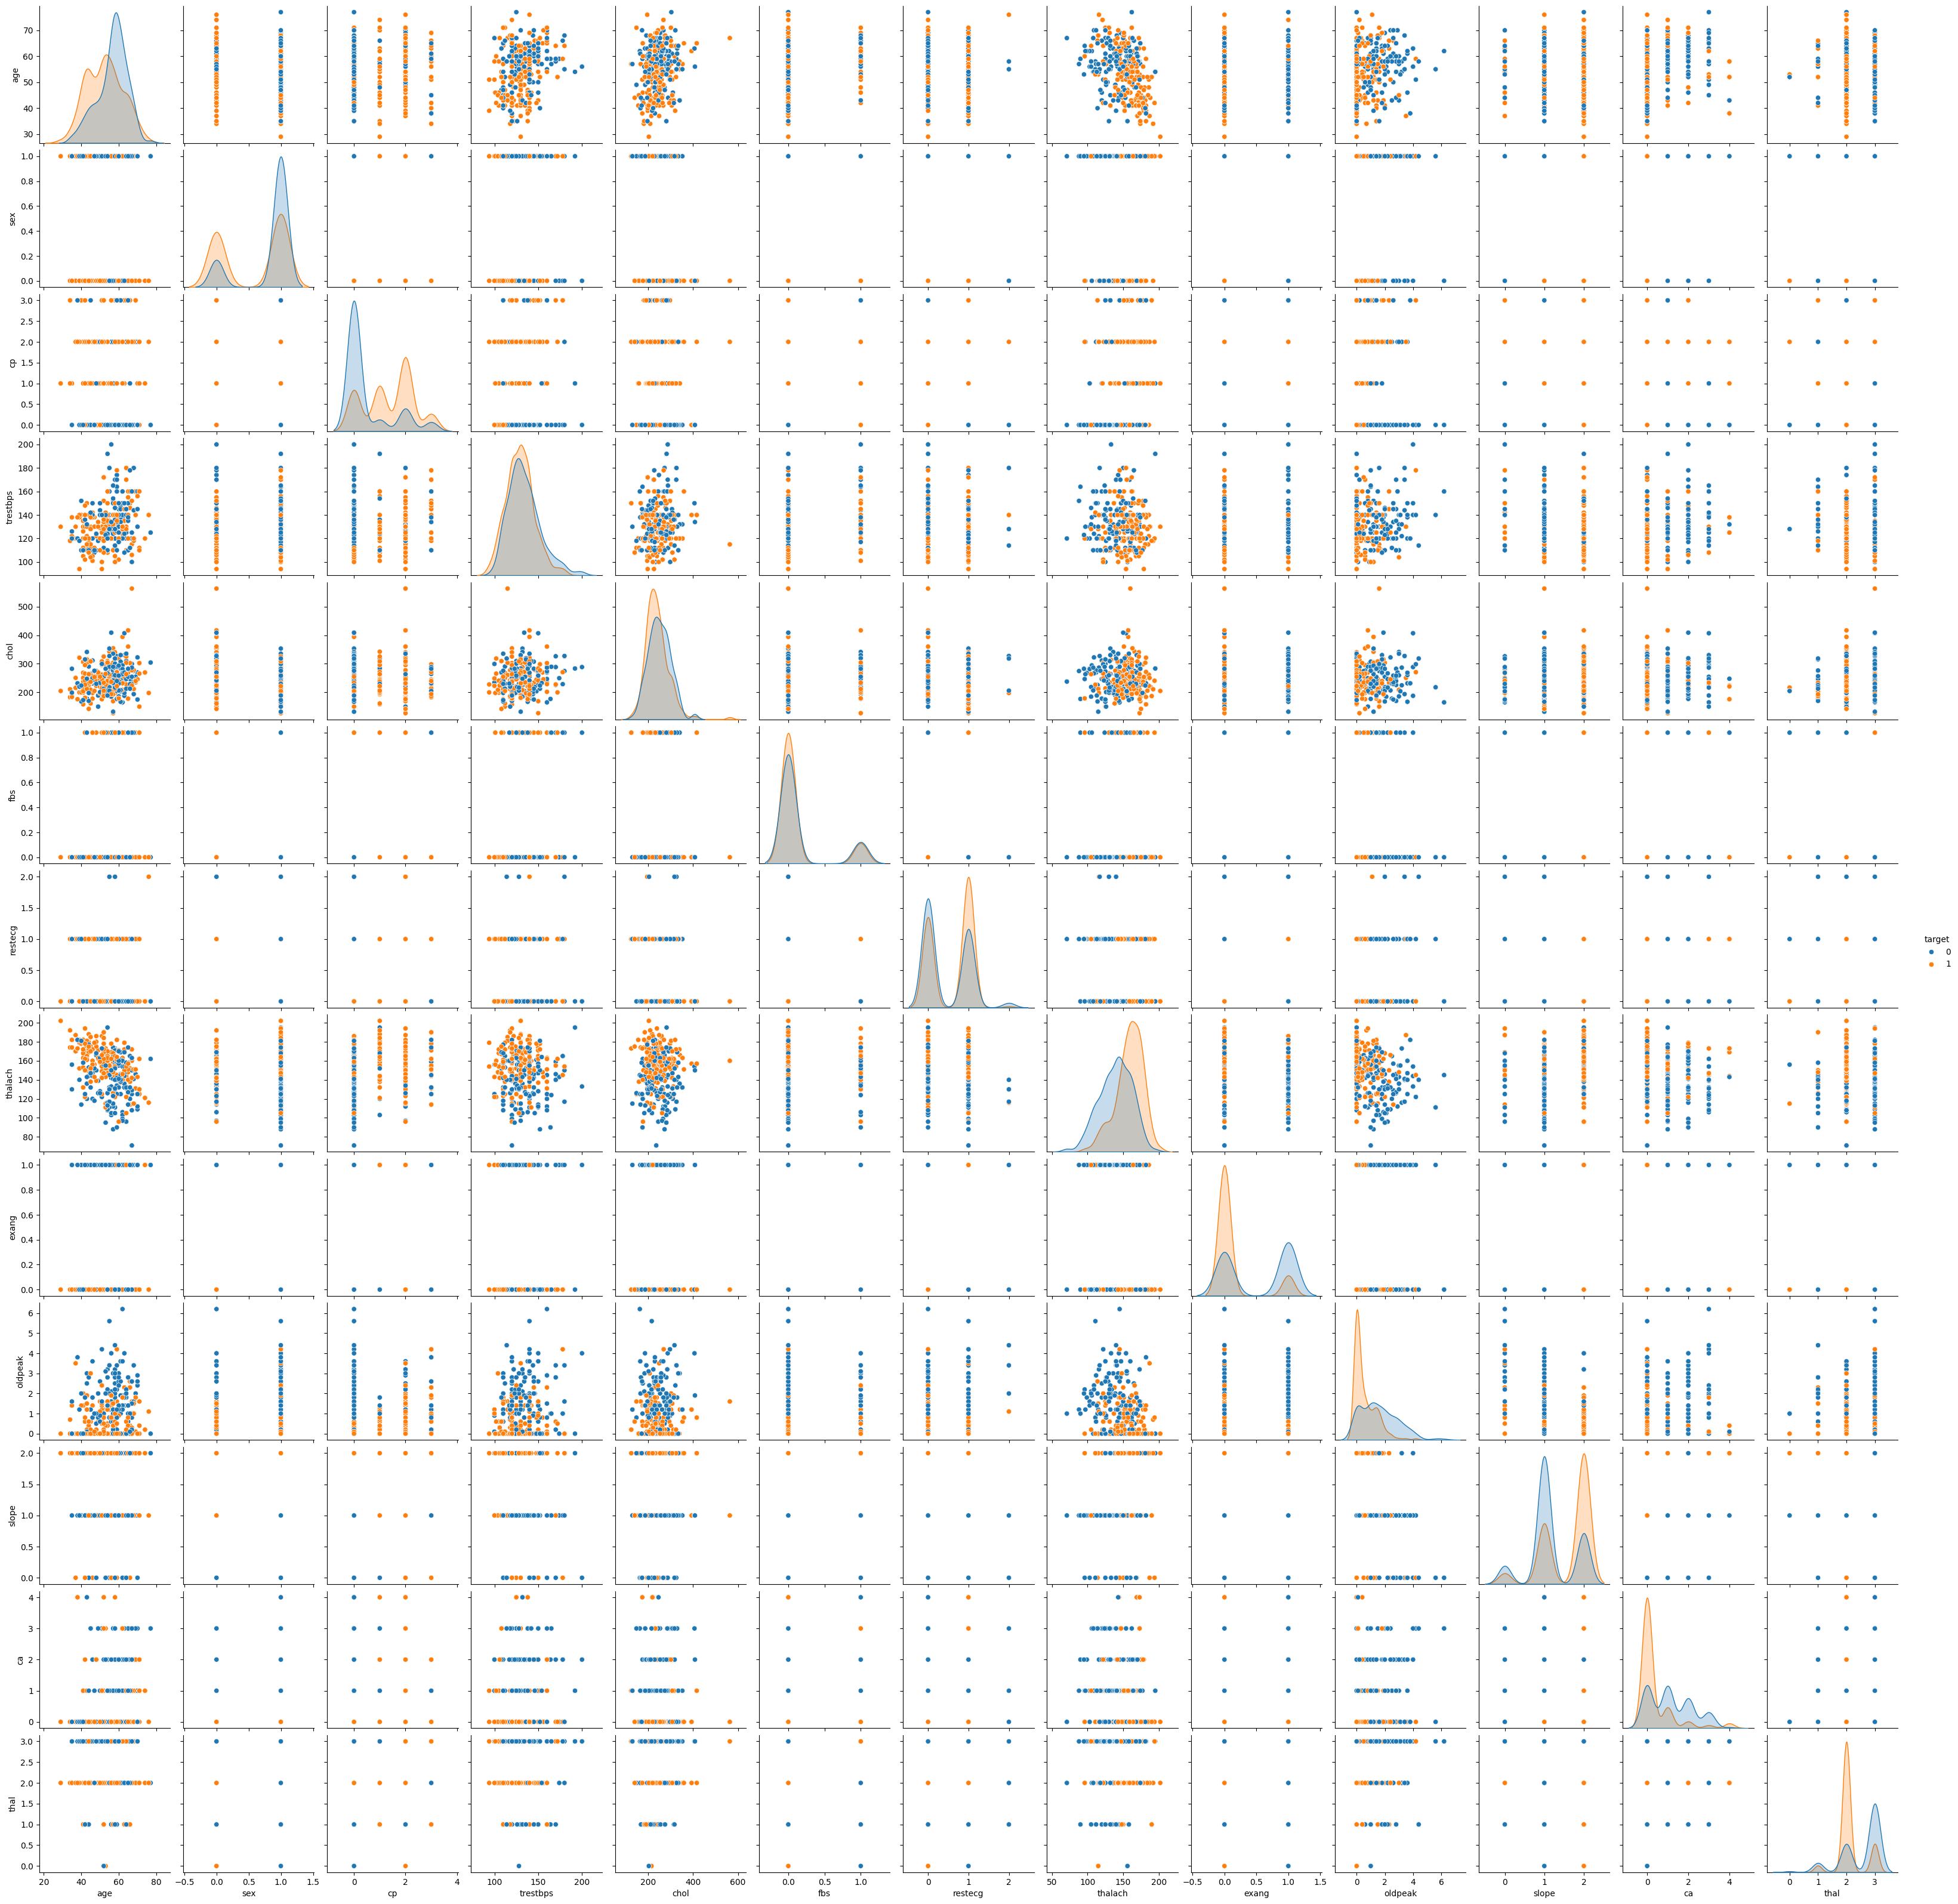

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/dataset.csv')


# Display basic info
print(df.info())
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize distributions and correlations
sns.pairplot(df, hue='target')
plt.show()


In [2]:
print("Column names:", df.columns)


Column names: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Accuracy: 0.9853658536585366
Confusion Matrix:
[[102   0]
 [  3 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



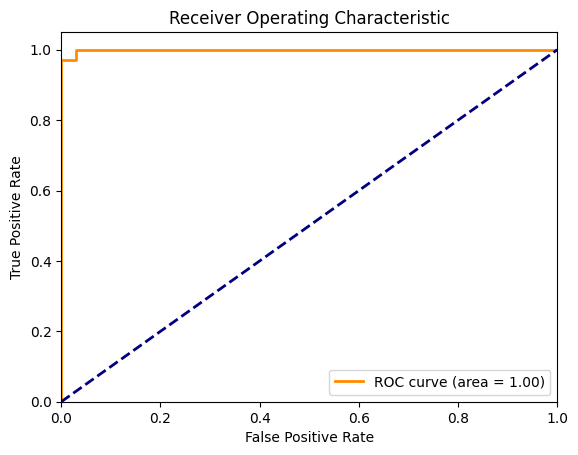

In [3]:
# Import necessary libraries
import joblib
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Define the label encoders and their mappings
label_encoders = {
    'sex': LabelEncoder(),
    'cp': LabelEncoder(),
    'fbs': LabelEncoder(),
    'restecg': LabelEncoder(),
    'exang': LabelEncoder(),
    'slope': LabelEncoder(),
    'thal': LabelEncoder()
}

# Define the mappings based on your training data
# You need to specify the classes based on the data you used during training
label_encoders['sex'].classes_ = ['Male', 'Female']  # Example classes
label_encoders['cp'].classes_ = [0, 1, 2, 3]  # Example classes
label_encoders['fbs'].classes_ = [0, 1]  # Example classes
label_encoders['restecg'].classes_ = [0, 1, 2]  # Example classes
label_encoders['exang'].classes_ = [0, 1]  # Example classes
label_encoders['slope'].classes_ = [0, 1, 2]  # Example classes
label_encoders['thal'].classes_ = [0, 1, 2]  # Example classes

# Reload the dataset
df = pd.read_csv('../data/dataset.csv')

# Preprocess the data
# Encode categorical features
for column in label_encoders.keys():
    df[column] = label_encoders[column].fit_transform(df[column])

# Load the previously saved model and scaler
model = joblib.load('../models/heart_disease_model.pkl')
scaler = joblib.load('../models/scaler.pkl')

# Feature scaling
X = scaler.transform(df.drop('target', axis=1))
y = df['target']

# Split data (use the same split as during model training if possible)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict on test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib
import tkinter as tk
from tkinter import messagebox

In [5]:
ds =pd.read_csv("../data/dataset.csv")

In [6]:
ds.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
5   0     2       1  
6   3     1       0  
7   1     3       0  
8   0     3       0  
9   2     2       0

In [7]:
ds.tail(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [8]:
ds.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
ds.shape

(1025, 14)

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
ds.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
ds.describe().T

count        mean        std    min    25%    50%    75%    max
age       1025.0   54.434146   9.072290   29.0   48.0   56.0   61.0   77.0
sex       1025.0    0.695610   0.460373    0.0    0.0    1.0    1.0    1.0
cp        1025.0    0.942439   1.029641    0.0    0.0    1.0    2.0    3.0
trestbps  1025.0  131.611707  17.516718   94.0  120.0  130.0  140.0  200.0
chol      1025.0  246.000000  51.592510  126.0  211.0  240.0  275.0  564.0
fbs       1025.0    0.149268   0.356527    0.0    0.0    0.0    0.0    1.0
restecg   1025.0    0.529756   0.527878    0.0    0.0    1.0    1.0    2.0
thalach   1025.0  149.114146  23.005724   71.0  132.0  152.0  166.0  202.0
exang     1025.0    0.336585   0.472772    0.0    0.0    0.0    1.0    1.0
oldpeak   1025.0    1.071512   1.175053    0.0    0.0    0.8    1.8    6.2
slope     1025.0    1.385366   0.617755    0.0    1.0    1.0    2.0    2.0
ca        1025.0    0.754146   1.030798    0.0    0.0    0.0    1.0    4.0
thal      1025.0    2.323902   0.620660    0.0    2.0    2.0    3.0    3.0
target    1025.0    0.513171   0.500070    0.0    0.0    1.0    1.0    1.0

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded as ds

ds.hist(bins=20, figsize=(10, 10), color='#921A40')
plt.show()


# ds.hist(bins=20,figsize=(10,10))


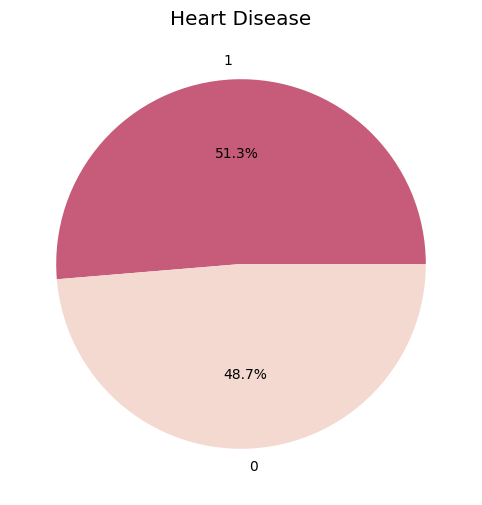

In [14]:
# Heart_Disease_counts = ds["target"].value_counts()
# plt.figure(figsize=(12,6))
# plt.pie(Heart_Disease_counts, labels=Heart_Disease_counts.index, autopct='%1.1f%%')
# plt.title('Heart Disease')
# plt.show()

Heart_Disease_counts = ds["target"].value_counts()
colors = ['#C75B7A', '#F4D9D0']
plt.figure(figsize=(12, 6))
plt.pie(Heart_Disease_counts, labels=Heart_Disease_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Heart Disease')
plt.show()

In [15]:
# features = ['age', 'trestbps', 'chol', 'thalach']

# plt.figure(figsize=(18, 10))

# for i, feature in enumerate(features):
#     plt.subplot(2, 2, i + 1)
#     sns.distplot(ds[feature].dropna(), kde=True, bins=10)  
#     plt.title(f'Distribution of {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Density')

# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
colors = '#C75B7A'
features = ['age', 'trestbps', 'chol', 'thalach']
plt.figure(figsize=(18, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(ds[feature].dropna(), kde=True, bins=10, color=colors)  
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()


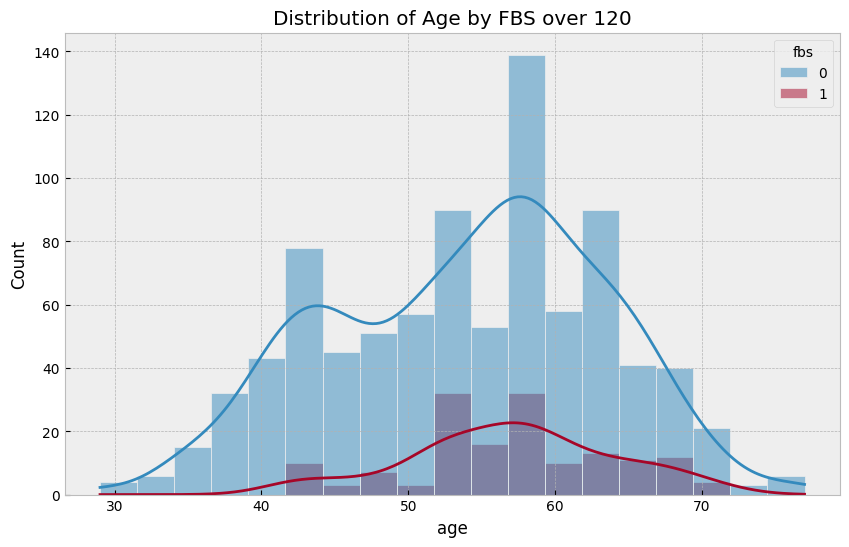

C:\Users\Tamanna Shaw\AppData\Local\Temp\ipykernel_4552\2974939472.py:9: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(data=ds, x='age', hue='fbs', kde=False, palette=['#C75B7A'], alpha=0.6)
C:\Users\Tamanna Shaw\AppData\Local\Temp\ipykernel_4552\2974939472.py:10: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.kdeplot(data=ds, x='age', hue='fbs', palette=['#D9ABAB'], linewidth=2)


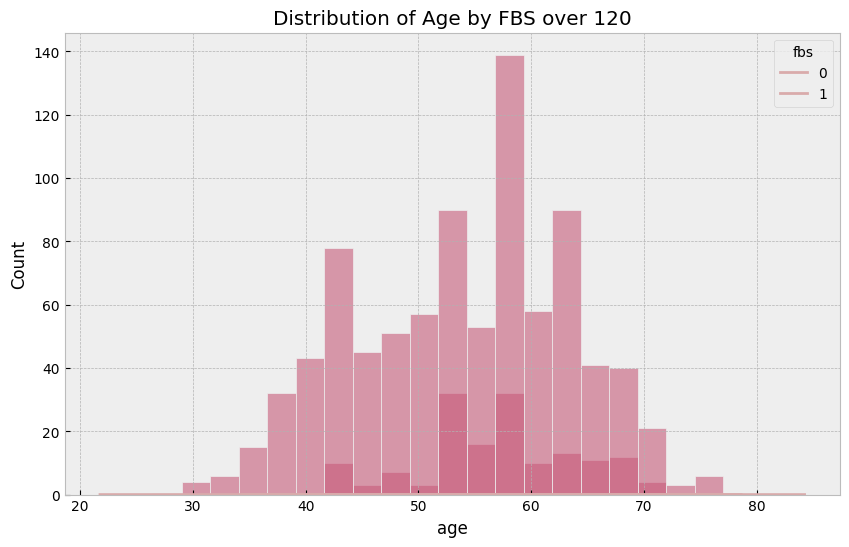

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=ds, x='age', hue='fbs', kde=True)
plt.title('Distribution of Age by FBS over 120')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=ds, x='age', hue='fbs', kde=False, palette=['#C75B7A'], alpha=0.6)
sns.kdeplot(data=ds, x='age', hue='fbs', palette=['#D9ABAB'], linewidth=2)
plt.title('Distribution of Age by FBS over 120')
plt.show()

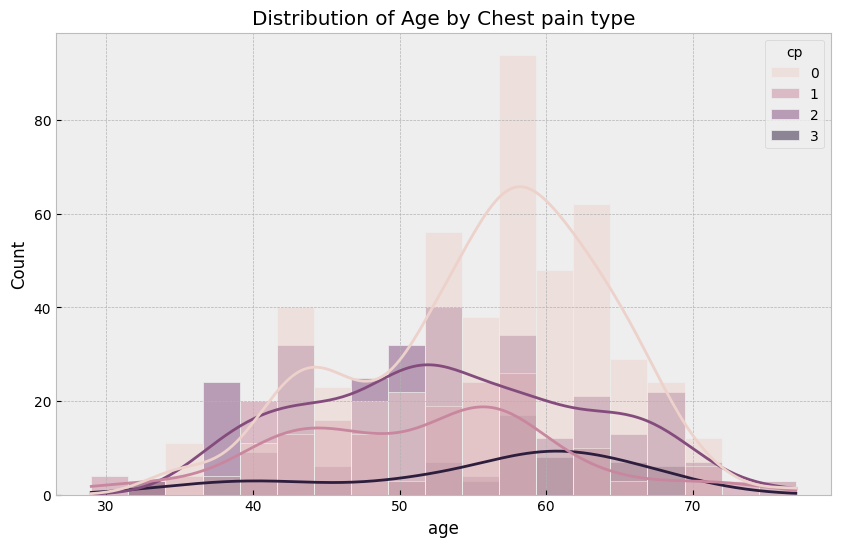

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=ds, x='age', hue='cp', kde=True)
plt.title('Distribution of Age by Chest pain type')
plt.show()

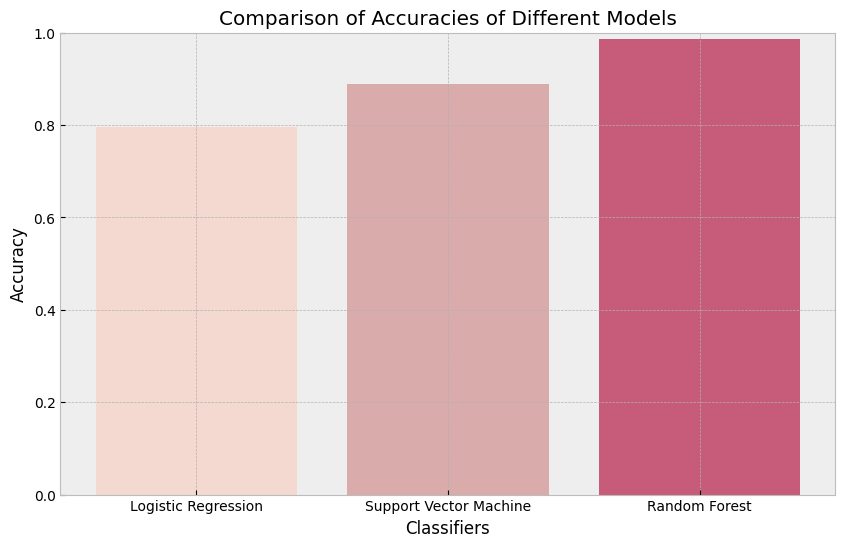

In [18]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../data/dataset.csv')

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('target', axis=1))
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(probability=True),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Plot results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['#F4D9D0', '#D9ABAB', '#C75B7A'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies of Different Models')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()
